<a href="https://colab.research.google.com/github/Rsoni94/Airbnb_NYC_Data_Analysis/blob/main/Airbnb_NYC_2019_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path='/content/drive/MyDrive/Airbnb NY Project/Airbnb NYC 2019.csv'
airbnb_df= pd.read_csv(file_path)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
airbnb_df.shape

(48895, 16)

## **There are 48895 rows and 16 columns**

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Here we can see that there are null values in last_review and reviews_per_month column moreover very few null values in name and host_name

In [7]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are very less null value in name and host_name moreover high null values in last_review,reviews_per_month

In [8]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
pd.set_option('float_format', '{:,.2f}'.format)
airbnb_df.describe(exclude='object')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,"19,017,143.24","67,620,010.65",40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,"10,983,108.39","78,610,967.03",0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,"2,539.00","2,438.00",40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,"9,471,945.00","7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,"19,677,284.00","30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,"29,152,178.50","107,434,423.00",40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,"36,487,245.00","274,321,313.00",40.91,-73.71,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


Here we can infer that,



1.   for price mean is 152.72 dollar and std deviation is 240.15 dollar so it means there is a variation in data
2.   Average avaibility of hotel per year is 112 days





In [10]:
pd.set_option('float_format', '{:,.2f}'.format)
airbnb_df.describe(include ='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Here we infer that,

1. Host name Michel from manhattan has rent maximum type Entire_home/apt in 2019

In [11]:
airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [12]:
airbnb_df.duplicated().sum()

0

There are 0 duplicated values in dataset 

In [13]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

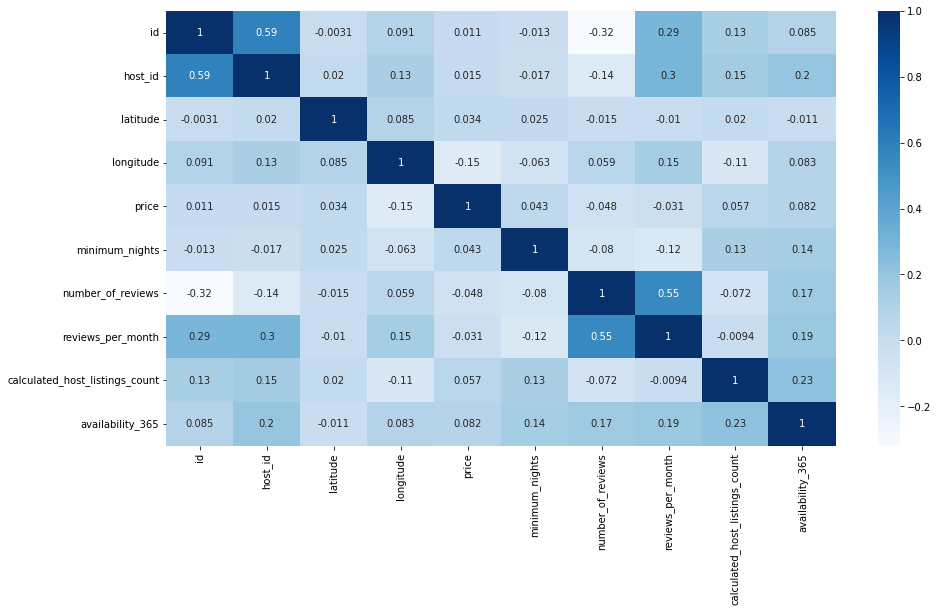

In [14]:
corr_df= airbnb_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, annot=True,cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


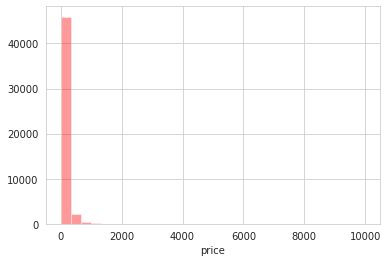

In [15]:
sns.set_style('whitegrid')
sns.distplot(airbnb_df['price'], kde = False, color ='red', bins = 30)

# **Question-1- in which room type maximum neighbourhood_group occupied?**

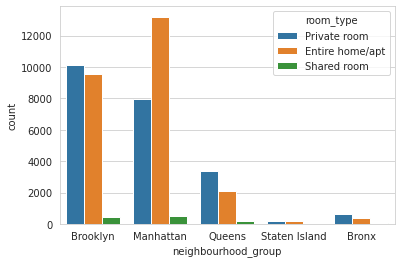

In [16]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df)

# **Question-2 Which 5 neighbourhood has maximum number of transaction??**

In [17]:
airbnb_df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [18]:
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

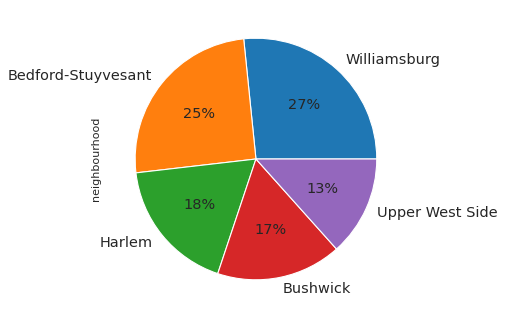

In [19]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

# We can see that Williamsburg is the maximum area of transaction followed by Bedford-Stuyvesant.

# This pie-chart shows the top 5 areas by percentage in the dataset

## ** Question-3 Comparision between Room Type Vs Price Vs Neighbourhood_Group and make a conclusion**

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

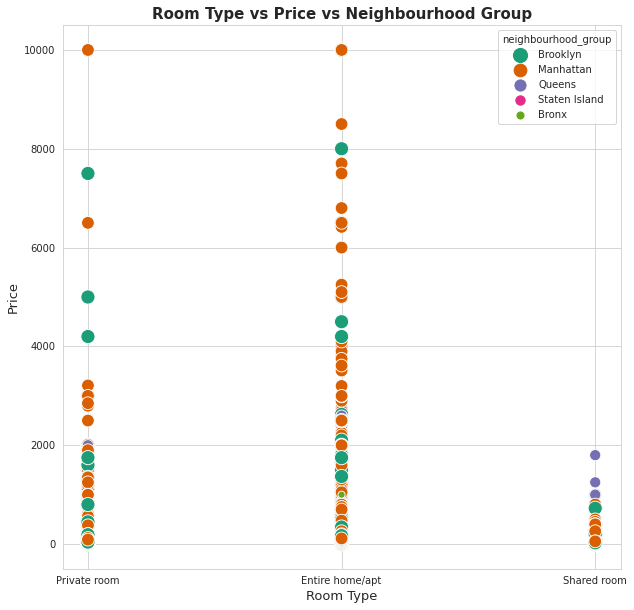

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=airbnb_df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

## **Question-4 Rooms with top 100 minimum_nights  by neighbourhood**

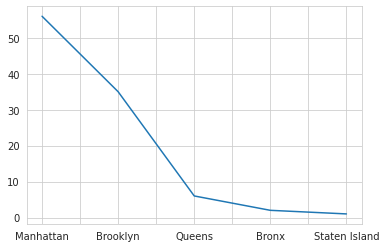

In [21]:
top_100_nights=airbnb_df.sort_values(by=['minimum_nights'],ascending=False).head(100)
top_100_nights['neighbourhood_group'].value_counts().plot()

# Manhattan has highest airbnbs with highest minimum nights.

# **Question-5 Rooms with top 100 expensive by neighbourhood**

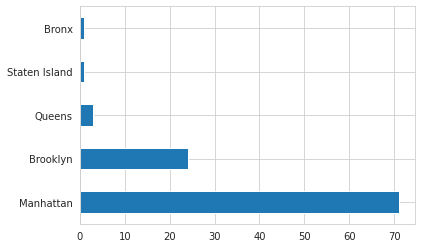

In [22]:
df1=airbnb_df.sort_values(by=['price'],ascending=False).head(100)
df1['neighbourhood_group'].value_counts().plot(kind = 'barh')

## **If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.**

# **Question-6 Which ranges of Latitude and Longitude covers the most room type**

In [23]:
airbnb_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


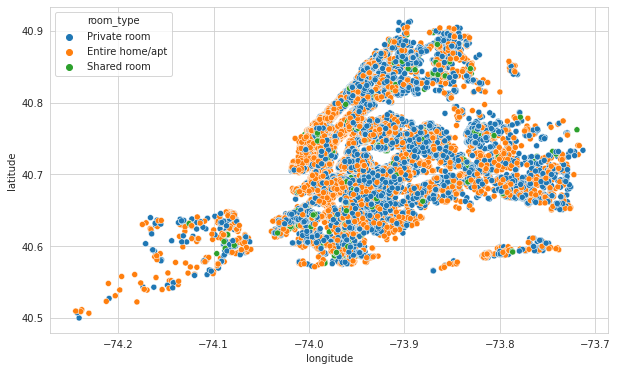

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.room_type)

Between Lattitude (40.9 to 40.6) & longitude(-74.0 to -73.85) there are most of the rooms available

# **Question-7 In Which Latitude and Longitude most room availablity for 365 days??**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


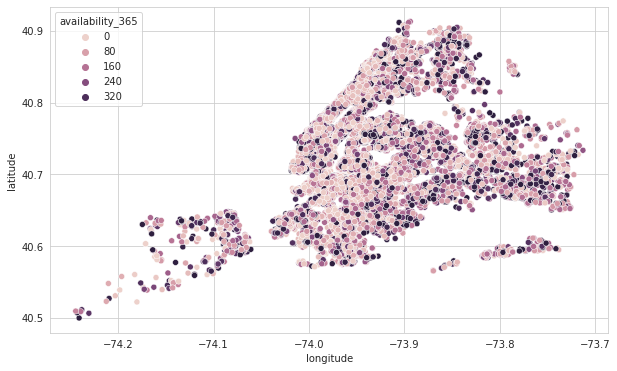

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.availability_365)

Between Lattitude (40.9 to 40.6) & longitude(-74.0 to -73.85) there are more rooms are available 365 days

# Question-8 Which area is costly for leaving and which area is cheap?

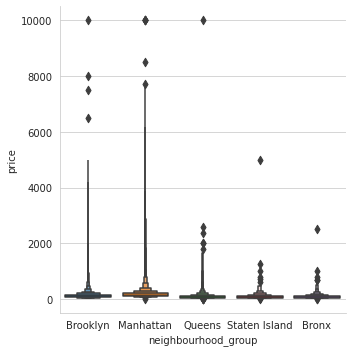

In [26]:
sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
            data=airbnb_df);

In [27]:
price_neigbourhood=airbnb_df.groupby(['neighbourhood_group'])['price'].max()
price_neigbourhood.head()

neighbourhood_group
Bronx             2500
Brooklyn         10000
Manhattan        10000
Queens           10000
Staten Island     5000
Name: price, dtype: int64

Manhatten and Brooklyn are the areas which are costly and staten island & Bronx are cheap

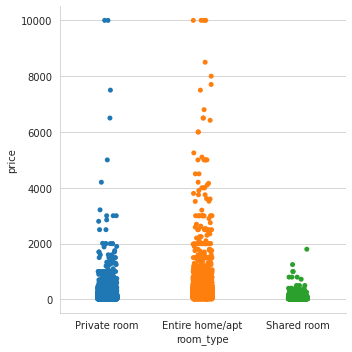

In [28]:
#catplot room type and price
sns.catplot(x="room_type", y="price", data=airbnb_df);

In [29]:
price_room_type=airbnb_df.groupby(['room_type'])['price'].max()
price_room_type.head()

room_type
Entire home/apt    10000
Private room       10000
Shared room         1800
Name: price, dtype: int64

# Question 9- Which Host_id has maximum transaction

In [30]:
airbnb_df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

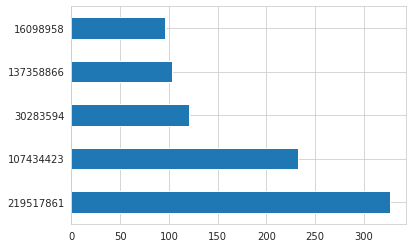

In [31]:
airbnb_df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

## Host_id 219517861 has maximum number of transaction done in 2019

# **CONCLUSION**

# 1. Lot of apartments are available in manhattan compared to any other place and bronx has less apartments and more single rooms. 
# 2. Apartments cost way more than single rooms. Manhattan and brooklyn has costlier rooms and apartments. 
# 3. Between Lattitude (40.9 to 40.6) & longitude(-74.0 to -73.85) there are most of the rooms available